In [ ]:
import scipy as scp
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np

<ipython-input-2-bb60b14249b8>:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face.append(misc.face(gray=False))
<ipython-input-2-bb60b14249b8>:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face.append(misc.face(gray=True))
<ipython-input-2-bb60b14249b8>:9: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face.append(misc.face(gray=True))
<ipython-input-2-bb60b14249b8>:11: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in S

<Figure size 640x480 with 0 Axes>

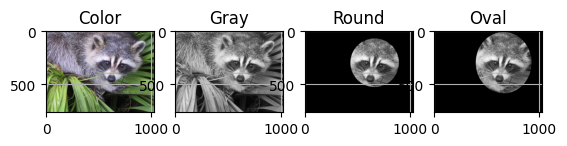

In [ ]:
face = []
face.append(misc.face(gray=False))
face.append(misc.face(gray=True))
sy, sx = face[1].shape
y, x = np.ogrid[0:sy, 0:sx] # x и y обозначают пиксели
y.shape, x.shape
centerx, centery = (660, 300) # центр изображения
mask = ((y - centery)**2 + (x - centerx)**2) > 230**2 # круг
face.append(misc.face(gray=True))
face[2][mask] = 0
face.append(misc.face(gray=True))
a, b = 1.1, 1.15
mask = ((y-centery)**2 / a**2 + (x - centerx)**2) / b**2 > 230**2
face[3][mask] = 0

plt.figure()
fig, pltarr = plt.subplots(1,4)
title = ['color', 'gray', 'round', 'oval']

pltarr[0].imshow(face[0])
pltarr[0].set_title(title[0].capitalize())
pltarr[0].grid(True)
for i in range(3):
  pltarr[i+1].imshow(face[i+1], cmap = plt.cm.gray)
  pltarr[i+1].set_title(title[i+1].capitalize())
  pltarr[i+1].grid(True)
plt.show()

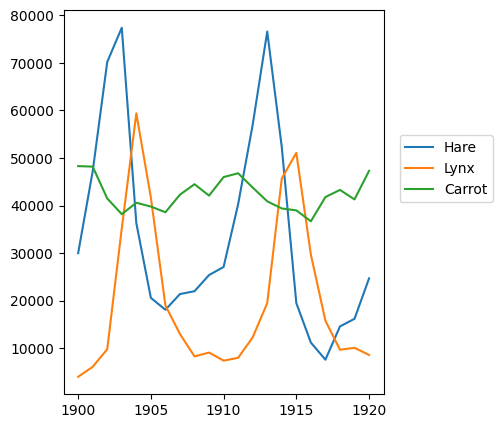

In [ ]:
data = np.loadtxt('https://scipy-lectures.org/_downloads/populations.txt')
year, hares, lynxes, carrots = data.T  # колонки в переменные
plt.axes([0.2, 0.1, 0.5, 0.8])
plt.plot(year, hares, year, lynxes, year, carrots)
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))

In [ ]:
print("Mean: ", np.mean(data,0)[1:])
print("Standart deviation ", np.std(data,0)[1:])
print("Maximum of each kind ", data[np.where(data[:,1] == max(data[:,1]))[0][0]][0], data[np.where(data == max(data[2]))[0][0]][0], data[np.where(data == max(data[3]))[0][0]][0])
print("Maximum of each year ", np.take(['Y', 'H', 'L', 'C'] ,np.argsort(data)[:,3]))
mask  = (data[:,1] > 50000) | (data[:,2] > 50000) | (data[:,3] > 50000)
mask1 = (data[:,1] > 50000) & (data[:,2] > 50000) & (data[:,3] > 50000)
print("Years where at least one population is greater than 50000 ", data[mask][:,0])
print("Years where all populations were greater than 50000 ", data[mask1][:,0])
print("Years where hares are minimum ",data[np.argsort(data,axis = 0)[len(data)-2:len(data),1],0])
print("Years where lynx are minimum ",data[np.argsort(data,axis = 0)[len(data)-2:len(data),2],0])
print("Years where carrot are minimum ",data[np.argsort(data,axis = 0)[len(data)-2:len(data),3],0])

Mean:  [34080.95238095 20166.66666667 42400.        ]
Standart deviation  [20897.90645809 16254.59153691  3322.50622558]
Maximum of each kind  1903.0 1902.0 1903.0
Maximum of each year  ['C' 'C' 'H' 'H' 'L' 'L' 'C' 'C' 'C' 'C' 'C' 'C' 'H' 'H' 'H' 'L' 'C' 'C'
 'C' 'C' 'C']
Years where at least one population is greater than 50000  [1902. 1903. 1904. 1912. 1913. 1914. 1915.]
Years where all populations were greater than 50000  []
Years where hares are minimum  [1913. 1903.]
Years where lynx are minimum  [1915. 1904.]
Years where carrot are minimum  [1901. 1900.]


[[ 1.         -0.91792485]
 [-0.91792485  1.        ]]


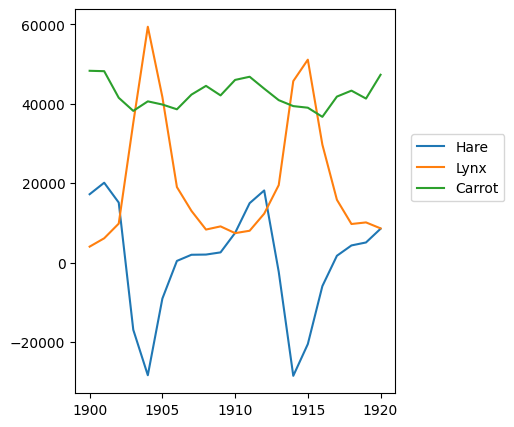

In [ ]:
year, hares, lynxes, carrots = data.T

plt.axes([0.2, 0.1, 0.5, 0.8])
plt.plot(year, np.gradient(hares), year, lynxes, year, carrots)
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))
print(np.corrcoef(np.gradient(hares),lynxes))

<ipython-input-6-2e4e72f79f3f>:12: RuntimeWarning: overflow encountered in square
  z=z**2+c
<ipython-input-6-2e4e72f79f3f>:12: RuntimeWarning: invalid value encountered in square
  z=z**2+c


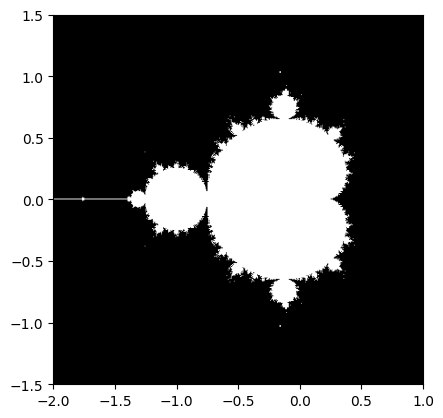

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis

def calculateMandelbrot(N_max,some_threshold,nx,ny):
  x=np.linspace(-2,1,nx)
  y=np.linspace(-1.5,1.5,ny)
  c=x[:,newaxis] +1j*y[newaxis,:]

  z=c
  for j in range(N_max):
    z=z**2+c

  mandelbrot_set=(abs(z) < some_threshold)

  return mandelbrot_set

mandelbrot_set=calculateMandelbrot(50,50,601,401)

plt.imshow(mandelbrot_set.T,extent=[-2,1,-1.5,1.5])
plt.gray()
plt.savefig('mandelbrot')

In [ ]:
## task 4



\begin{align*}
\frac{dx}{dt} &= v_x \\
\frac{dy}{dt} &= v_y \\
\frac{dv_x}{dt} &= a_x = -\frac{GM_\star x}{r^3} \\
\frac{dv_y}{dt} &= a_y = -\frac{GM_\star y}{r^3}
\end{align*}
$$r_p = a (1 - e)$$
$$v_y = v_p = \sqrt{\frac{GM_\star}{a} \frac{1+e}{1-e}}$$
$GM_\star = 4\pi^2$
  * $x(t=0) = r_p$
  * $y(t=0) = 0$
  * $v_x(t=0) = 0$
  * $v_y(t=0) = v_p$


In [ ]:
def rhs(t, Y, GM=4*np.pi**2):
    """RHS для орбит, Y вектор решения, содержащий
    x, y, v_x, иv_y"""

    x, y, vx, vy = Y
    f = np.zeros_like(Y)

    # dx/dt = vx
    f[0] = vx

    # dy/dt = vy
    f[1] = vy

    # d(vx)/dt = -GMx/r**3
    r = np.sqrt(x**2 + y**2)
    f[2] = -GM*x/r**3

    # d(vy)/dt = -GMy/r**3
    f[3] = -GM*y/r**3

    return f

In [ ]:
Y = [5, 0, 0, 3]
for i in range(50):
  Y = rhs(i, Y)
  print(i, Y)

0 [ 0  3 -1  0]
1 [-1  0  0 -4]
2 [ 0 -4 39  0]
3 [39  0  0  2]
4 [0 2 0 0]
5 [ 0  0  0 -9]


<ipython-input-29-1fa389ab9081>:16: RuntimeWarning: invalid value encountered in double_scalars
  f[2] = -GM*x/r**3


ValueError: ignored